In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def aitken(x, y, xx):
    '''
    Вычисление интерполяционного полинома в форме Лагранжа по схеме Эйткена
    x - массив координат узлов
    y - массив значений интерполируемой функции
    xx - массив значений аргумента, для которых надо вычислить значения
    полинома
    '''
    # Ваш код здесь

In [1]:
def newton(x, y, xx):
    '''
    вычисление интерполяционного полинома в форме Ньютона
    x - массив координат узлов
    y - массив значений интерполируемой функции
    xx - массив значений аргумента, для которых надо вычислить значения
    полинома
    '''
    # Ваш код здесь

In [ ]:
def aitken_scheme(x_values, y_values):
  """
  Вычисляет интерполяционный полином Лагранжа с помощью схемы Эйткена.

  Args:
    x_values: Массив значений x.
    y_values: Массив значений y.

  Returns:
    Функция, представляющая интерполяционный полином.
  """
  n = len(x_values)
  p = np.zeros((n, n))
  p[:,0] = y_values

  for j in range(1, n):
    for i in range(n-j):
      p[i,j] = (p[i+1,j-1] - p[i,j-1]) / (x_values[i+j] - x_values[i])

  def L(x):
    result = p[0,0]
    for j in range(1, n):
      term = p[0,j]
      for i in range(j):
        term *= (x - x_values[i])
      result += term
    return result

  return L

## Проверка

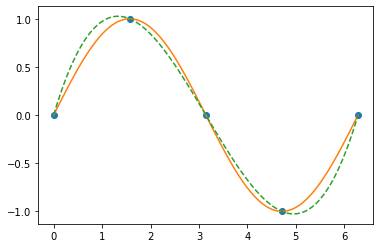

In [ ]:
x = np.linspace(0, np.pi * 2, 5)
y = np.sin(x)
xx = np.linspace(0, np.pi * 2, 100)
yyl = aitken(x, y, xx)
yyn = newton(x, y, xx)
assert np.allclose(yyl, yyn)
plt.plot(x, y, 'o', xx, np.sin(xx), xx, yyl, '--')
plt.show()